In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yohelperez","key":"420636d481c027119f2bfaa663e73be1"}'}

# ***Descargar Dataset desdee kaggle***

In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download 'rounakbanik/the-movies-dataset'

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
 59% 134M/228M [00:00<00:00, 1.40GB/s]
100% 228M/228M [00:00<00:00, 735MB/s] 


In [ ]:
! unzip the-movies-dataset.zip

Archive:  the-movies-dataset.zip
replace credits.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: credits.csv             
replace keywords.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: keywords.csv            
replace links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: links.csv               
replace links_small.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: links_small.csv         
replace movies_metadata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: movies_metadata.csv     
replace ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ratings.csv             y
y
y

replace ratings_small.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: ratings_small.csv       


In [ ]:
! rm the-movies-dataset.zip
! rm kaggle.json

# **Imports y Datos**

In [ ]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import json

!pip install "numpy<2"

In [ ]:
import numpy as np

In [ ]:
# Crear dataset de movies y ratings

movies = pd.read_csv('movies_metadata.csv')
ratings = pd.read_csv('ratings_small.csv')
links = pd.read_csv('links.csv')

/tmp/ipython-input-931178301.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_metadata.csv')


# **Analisis DataSet**

Para escoger un correcto algoritmo se debe explorar los datos , para eso se hace un analisis  de los datos para saber como estan distribuidos

GRAPHIC


/tmp/ipython-input-3379563364.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




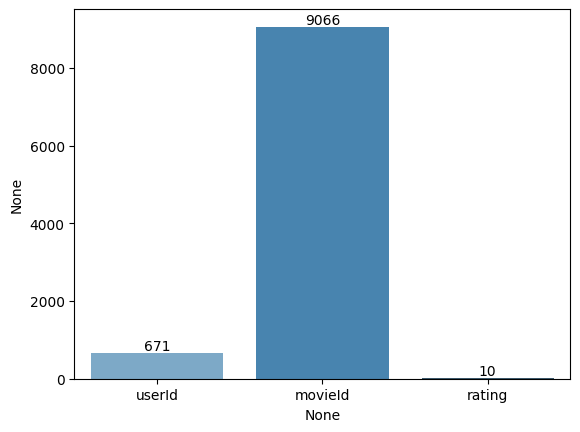

INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
UNIQUE DATA
userId         671
movieId       9066
rating          10
timestamp    78141
dtype: int64


In [ ]:
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)
#Analisando ratings  , cuantos datos unicos hay en cada columna


print("GRAPHIC")
print("============"*8)

ratings_graphic = ratings.drop("timestamp",axis=1)
ax = sns.barplot(x=ratings_graphic.columns,y=ratings_graphic.nunique(axis=0),palette="Blues_d")
for p in ax.patches:
  ax.annotate( str(p.get_height().astype(int)),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.show()

print("============"*8)
print("INFORMATION")
print("============"*8)
print(ratings.info())
print("============"*8)
print("UNIQUE DATA")
print("============"*8)
print(ratings.nunique(axis=0))
print("============"*8)


**Peguntas :**

Que peliculas tienen mas reviews ?

Que usuarios dan mas reviews ?

como luce la distribucion para ratings ?

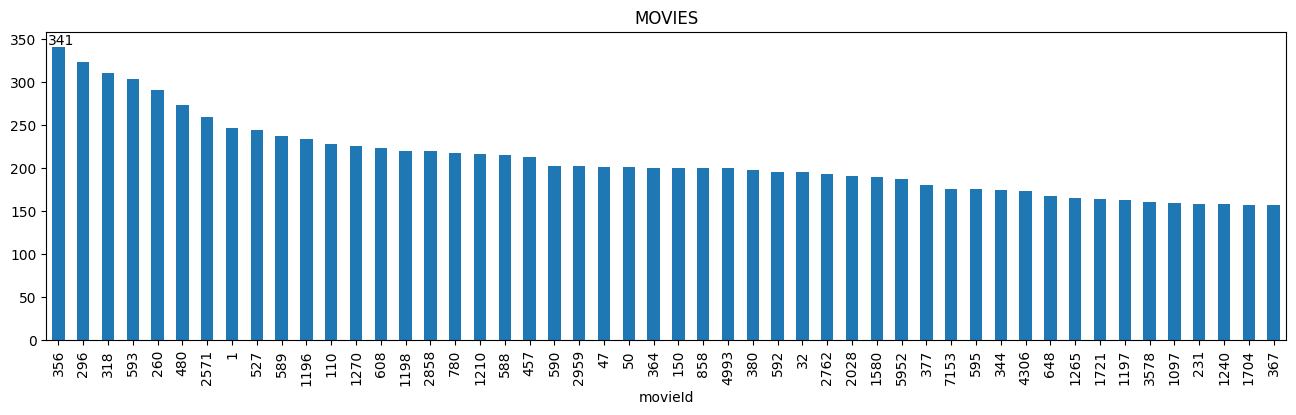

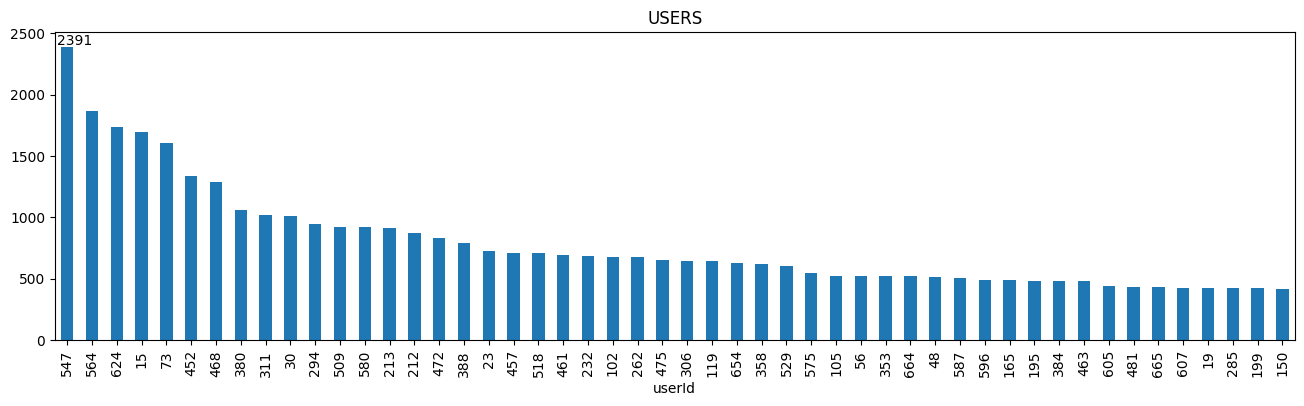

rating
5.0    15095
4.5     7723
4.0    28750
3.5    10538
3.0    20064
2.5     4449
2.0     7271
1.5     1687
1.0     3326
0.5     1101
Name: count, dtype: int64
Index([5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5], dtype='float64', name='rating')
[15095  7723 28750 10538 20064  4449  7271  1687  3326  1101]
100004


In [ ]:
plt.figure(1,figsize=(16,4))
plt.title("MOVIES")
j =ratings["movieId"].value_counts()[:50].plot(kind='bar') #toma las primeras 50 peliculas
p = j.patches[0]
j.annotate( str(p.get_height().astype(int)),
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha = 'center', va = 'center',
              xytext = (2, 4),
              textcoords = 'offset points')
plt.show()


plt.figure(2,figsize=(16,4))
plt.title("USERS")
j= ratings["userId"].value_counts()[:50].plot(kind='bar') #toma los primeros 50 usuarios

p = j.patches[0]
j.annotate( str(p.get_height().astype(int)),
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha = 'center', va = 'center',
              xytext = (5, 4),
              textcoords = 'offset points')
plt.show()

# plt.figure(3,figsize=(8,4))
# plt.title("DISTRIBUTION")
# j = ratings["rating"].plot(kind='hist') #Distribucion de ratings
# p = j.patches[0]
# j.annotate( str(p.get_height().astype(int)),
#               (p.get_x() + p.get_width() / 2., p.get_height()),
#               ha = 'center', va = 'center',
#               xytext = (5, 4),
#               textcoords = 'offset points')
# plt.show()

data = ratings['rating'].value_counts().sort_index(ascending=False)

# Create the trace data
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / ratings.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create figure layout
layout = dict(title = 'Distribución de {} valoraciones'.format(ratings.shape[0]),
              xaxis = dict(title = 'Valoración'),
              yaxis = dict(title = 'Recuento'))

# Create plot with data and layout
fig = go.Figure(data=[trace], layout=layout)
#iplot(fig)
fig.show(renderer='colab')
print(data)
print(data.index)
print(data.values)
print(ratings.shape[0])

**Respuestas**

* no todas las peliculas tienen una cantidad parecida de reviews , la pelicula con mas reviews es la 356 , con 350 calificaciones

* Las calificaciones no estan distribuidas uniformemente para los usuarios , el usuario 547 ha dado alrededor de 2400 calificaciones

* La mayoria de usuarios da una calificacion alrededor de 4

In [ ]:
#Movies with rating bigger than 400, will be set to 400
data = ratings.groupby('movieId')['rating'].count().clip(upper=50)

# Create the trace data
trace = go.Histogram(x = data.values,
                     name = 'Valoraciones',
                     xbins = dict(start = 1,
                                  end = 51,
                                  size = 2))
# Create figure layout
layout = go.Layout(title = 'Distribución de número de valoraciones por película',
                   xaxis = dict(title = 'Número de valoraciones por película'),
                   yaxis = dict(title = 'Recuento'),
                   bargap = 0.2)

# Create plot with data and layout
fig = go.Figure(data=[trace], layout=layout)
#iplot(fig)
fig.show(renderer='colab')


print("Recuento Película-Puntuación (Top 10)")
movie_ratings_count = ratings.groupby('movieId')['rating'].count().reset_index().sort_values('rating', ascending=False)[:10]
print(movie_ratings_count)

print("Número de películas: %s" % ratings.groupby('movieId')['rating'].count().shape[0])


Recuento Película-Puntuación (Top 10)
      movieId  rating
321       356     341
266       296     324
284       318     311
525       593     304
232       260     291
427       480     274
2062     2571     259
0           1     247
472       527     244
522       589     237
Número de películas: 9066


Que distribucion de calificaciones tiene cada pelicula ?
 - El 47% (4265)  de peliculas tienen entre 1 y 2 calificaciones
 - El 53% del total de peliculas tienen mas de 3 calificaciones
  

In [ ]:
#Users which gave more than 50 ratings, will be cut off to 50
data = ratings.groupby('userId')['rating'].count().clip(upper=50)

# Create the trace data
trace = go.Histogram(x = data.values,
                     name = 'Valoraciones',
                     xbins = dict(start = 0,
                                  end = 51,
                                  size = 2))
# Create figure layout
layout = go.Layout(title = 'Distribución de número de valoraciones por usuario (Límite de 50)',
                   xaxis = dict(title = 'Valoraciones por usuario'),
                   yaxis = dict(title = 'Recuento'),
                   bargap = 0.2)

# Create plot with data and layout
fig = go.Figure(data=[trace], layout=layout)
#iplot(fig)
fig.show(renderer='colab')


print("Recuento Usuario-Puntuación (Top 10)")
user_ratings_count = ratings.groupby('userId')['rating'].count().reset_index().sort_values('rating', ascending=False)[:10]
print(user_ratings_count)

print("Número de usuarios: %s" % ratings.groupby('userId')['rating'].count().shape[0])

Recuento Usuario-Puntuación (Top 10)
     userId  rating
546     547    2391
563     564    1868
623     624    1735
14       15    1700
72       73    1610
451     452    1340
467     468    1291
379     380    1063
310     311    1019
29       30    1011
Número de usuarios: 671


Que distribucion de calificaciones tiene cada usuario ?


 - El histograma muestra que la mayoria de usuarios (427 osea un  63% del total 671)
 tienen 50 o mas calificaciones

# **Limpiar y pre procesar Datos**

In [ ]:
print("=============="*8)
print("MOVIES")
print("=============="*8)
movies.info()
print("=============="*8)
print("RATINGS")
print("=============="*8)
ratings.info()
print("=============="*8)
print("LINKS")
print("=============="*8)
links.info()

MOVIES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 


La relacion entre los archivos del dataset es :

Ratings (movieId) -> Links(movieId)

Links(tmdbId)->Movies(id)

se observa que la columna Movies-id es tipo object , asi que se debe convertir a tipo Int64 para poder hacer efectiva la relacion entre Links-Movies


In [ ]:
movies["id"] =  pd.to_numeric(movies["id"],errors='coerce').astype('Int64')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45463 non-null  Int64  
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Para tener un dataset mas limpio , se analizan duplicados , registros faltantes entre las relaciones y datos vacios

In [ ]:
movies_duplicated = movies.groupby(['id']).size()
print("Peliculas duplicadas : ",movies_duplicated[movies_duplicated>1].shape[0])

ratings_duplicated = ratings.groupby(['userId','movieId']).size()
print("Reviews duplicadas : ",ratings_duplicated[ratings_duplicated>1].shape[0])

links_duplicated = links.groupby(['movieId','tmdbId']).size()
print("Links duplicadas : ",links_duplicated[links_duplicated>1].shape[0])

Peliculas duplicadas :  29
Reviews duplicadas :  0
Links duplicadas :  0


In [ ]:
#Eliminando movies sin Id
movies = movies.dropna(subset=["id"])

In [ ]:
#movies Id a entero
movies = movies.copy()
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')
movies = movies.dropna(subset=['id'])
movies['id'] = movies['id'].astype(int)

In [ ]:
#Eliminando peliculas duplicadas
print("cantidad de peliculas antes de eliminar duplicados :",movies.shape[0])
movies = movies.drop_duplicates(["id"])
print("cantidad de peliculas despues de eliminar duplicados :",movies.shape[0])

cantidad de peliculas antes de eliminar duplicados : 45463
cantidad de peliculas despues de eliminar duplicados : 45433


In [ ]:
#moviesId que existen en ratings pero no en links
ratings_movies_missed =  ratings[~ratings["movieId"].isin(links["movieId"])]
ratings_movies_missed.nunique(axis=0)

,0
userId,32
movieId,8
rating,8
timestamp,45


In [ ]:
#Id que existen en links pero no en movies
links_movie_missed = links[~links["tmdbId"].isin(movies["id"])]
links_movie_missed.nunique()

,0
movieId,380
imdbId,380
tmdbId,161


In [ ]:
#Ratings que deben ser descartados ya que no existen peliculas en Movies asociados al movieId en ratings
ratings_missed = ratings[ratings["movieId"].isin(links_movie_missed['movieId'])]
ratings_missed.shape

(148, 4)

In [ ]:
#Eliminacion de ratings innecesarios
print(ratings.shape[0])
ratings = ratings.drop(index=ratings_missed.index)
ratings = ratings.drop(index= ratings_movies_missed.index)
print(ratings.shape[0])

100004
99810


In [ ]:

ratings.shape


(99810, 4)

In [ ]:
# Se descartan peliculas que no han sido calificadas por ningun usuario
ranked_movies = pd.merge(ratings,links,on='movieId')[['movieId','tmdbId']]
ranked_movies= ranked_movies[['movieId','tmdbId']].drop_duplicates()
ranked_movies

,movieId,tmdbId
0,31,9909.0
1,1029,11360.0
2,1061,819.0
3,1129,1103.0
4,1172,11216.0
...,...,...
98938,64997,34812.0
98966,72380,22825.0
99081,129,110972.0
99485,4736,26602.0


# **Analisis para seleccion del algoritmo**

In [ ]:
!pip install scikit-surprise

In [ ]:
from surprise import Reader, Dataset, KNNWithMeans,SVD
from surprise.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from surprise.model_selection import train_test_split
from surprise import accuracy

In [ ]:
similarity = {
    "name": "cosine",
    "user_based": False,  # item-based similarity
}
algo_KNN = KNNWithMeans(sim_options = similarity)

# SVD
algo_SVD = SVD()

Model Evaluation Modelo de regresion por que la salida de nuestro modelo es un numero (calificacion ) para eso podemos usar metricas de evalauacion de regresion

In [ ]:
# load df into Surprise Reader object
reader = Reader(rating_scale = (0,5))
rating_df = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader) # se crea el reader y se carga el dataset para que la funcion cross_validation entienda el dataset

In [ ]:
from surprise.model_selection import cross_validate
cross_validate_KNN = cross_validate(algo_KNN, rating_df, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cross_validate_SVD = cross_validate(algo_SVD, rating_df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9230  0.9385  0.9307  0.9247  0.9203  0.9274  0.0065  
MAE (testset)     0.7072  0.7197  0.7112  0.7085  0.7056  0.7104  0.0050  
Fit time          7.89    5.64    5.42    5.44    5.64    6.01    0.95    
Test time         7.19    6.79    6.72    6.23    5.90    6.56    0.45    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8920  0.9022  0.8968  0.8914  0.8

In [ ]:
KNN_RMSE_mean = np.mean(cross_validate_KNN['test_rmse'])
KNN_MAE_mean = np.mean(cross_validate_KNN['test_mae'])
KNN_fit_time_mean =  np.mean(cross_validate_KNN['fit_time'])
KNN_test_time_mean =  np.mean(cross_validate_KNN['test_time'])

SVD_RMSE_mean = np.mean(cross_validate_SVD['test_rmse'])
SVD_MAE_mean = np.mean(cross_validate_SVD['test_mae'])
SVD_fit_time_mean =  np.mean(cross_validate_SVD['fit_time'])
SVD_test_time_mean =  np.mean(cross_validate_SVD['test_time'])

print("KNN RMSE : {:.3f}".format(KNN_RMSE_mean))
print("KNN MAE : {:.3f}".format(KNN_MAE_mean))
print("SVD RMSE : {:.3f}".format(SVD_RMSE_mean))
print("SVD MAE : {:.3f}".format(SVD_MAE_mean))


KNN RMSE : 0.927
KNN MAE : 0.710
SVD RMSE : 0.896
SVD MAE : 0.690


Se observa que SVD tiene en promedio valores de RMSE y MAE mas pequeños que KNN , esto es un indicio de que tiene un mejor desepeño que KNN

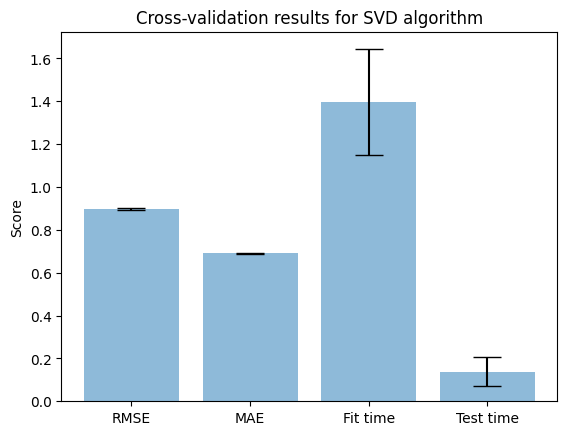

In [ ]:
cross_validate_SVD
rmse_mean = np.mean(cross_validate_SVD["test_rmse"])
rmse_std = np.std(cross_validate_SVD["test_rmse"])
mae_mean = np.mean(cross_validate_SVD["test_mae"])
mae_std = np.std(cross_validate_SVD["test_mae"])
fit_time_mean = np.mean(cross_validate_SVD["fit_time"])
fit_time_std = np.std(cross_validate_SVD["fit_time"])
test_time_mean = np.mean(cross_validate_SVD["test_time"])
test_time_std = np.std(cross_validate_SVD["test_time"])

# Create a bar plot of the cross-validation results
fig, ax = plt.subplots()
metric_names = ['RMSE', 'MAE', 'Fit time', 'Test time']
means = [rmse_mean, mae_mean, fit_time_mean, test_time_mean]
stds = [rmse_std, mae_std, fit_time_std, test_time_std]
ax.bar(metric_names, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Score')
ax.set_title('Cross-validation results for SVD algorithm')
plt.show()

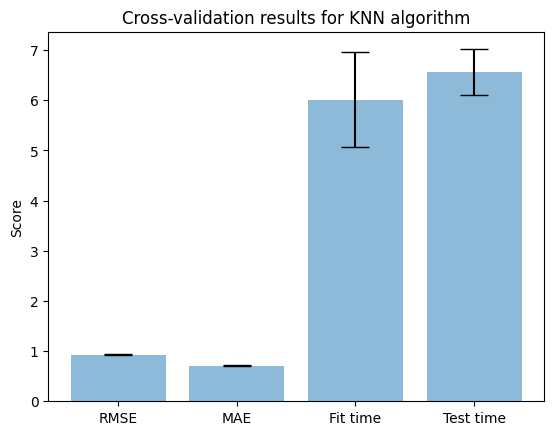

In [ ]:
cross_validate_KNN
rmse_mean = np.mean(cross_validate_KNN["test_rmse"])
rmse_std = np.std(cross_validate_KNN["test_rmse"])
mae_mean = np.mean(cross_validate_KNN["test_mae"])
mae_std = np.std(cross_validate_KNN["test_mae"])
fit_time_mean = np.mean(cross_validate_KNN["fit_time"])
fit_time_std = np.std(cross_validate_KNN["fit_time"])
test_time_mean = np.mean(cross_validate_KNN["test_time"])
test_time_std = np.std(cross_validate_KNN["test_time"])

# Create a bar plot of the cross-validation results
fig, ax = plt.subplots()
metric_names = ['RMSE', 'MAE', 'Fit time', 'Test time']
means = [rmse_mean, mae_mean, fit_time_mean, test_time_mean]
stds = [rmse_std, mae_std, fit_time_std, test_time_std]
ax.bar(metric_names, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Score')
ax.set_title('Cross-validation results for KNN algorithm')
plt.show()

In [ ]:
KNN_RMSE_mean = np.mean(cross_validate_KNN['test_rmse'])
KNN_MAE_mean = np.mean(cross_validate_KNN['test_mae'])
KNN_fit_time_mean =  np.mean(cross_validate_KNN['fit_time'])
KNN_test_time_mean =  np.mean(cross_validate_KNN['test_time'])

SVD_RMSE_mean = np.mean(cross_validate_SVD['test_rmse'])
SVD_MAE_mean = np.mean(cross_validate_SVD['test_mae'])
SVD_fit_time_mean =  np.mean(cross_validate_SVD['fit_time'])
SVD_test_time_mean =  np.mean(cross_validate_SVD['test_time'])

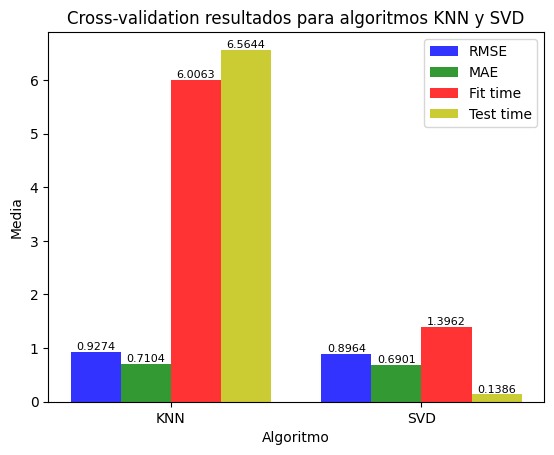

In [ ]:
algorithms = ['KNN', 'SVD']
rmse_scores = [KNN_RMSE_mean, SVD_RMSE_mean]
mae_scores = [KNN_MAE_mean, SVD_MAE_mean]
fit_times = [KNN_fit_time_mean, SVD_fit_time_mean]
test_times = [KNN_test_time_mean,SVD_test_time_mean]
fig, ax = plt.subplots()
metric_names = ['RMSE', 'MAE', 'Fit time', 'Test time']
bar_width = 0.2
opacity = 0.8
index = np.arange(len(algorithms))
rmse_bars = ax.bar(index, rmse_scores, bar_width, alpha=opacity, color='b', label='RMSE')
mae_bars = ax.bar(index + bar_width, mae_scores, bar_width, alpha=opacity, color='g', label='MAE')
fit_time_bars = ax.bar(index + 2*bar_width, fit_times, bar_width, alpha=opacity, color='r', label='Fit time')
test_time_bars = ax.bar(index + 3*bar_width, test_times, bar_width, alpha=opacity, color='y', label='Test time')
ax.set_xlabel('Algoritmo')
ax.set_ylabel('Media')
ax.set_title('Cross-validation resultados para algoritmos KNN y SVD')
ax.set_xticks(index + 1.5*bar_width)
ax.set_xticklabels(algorithms)
ax.legend()


def autolabel(bars):
    """Attach a text label above each bar in a grouped bar plot."""
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., height, '%.4f' % height,
                ha='center', va='bottom', fontsize=8)

autolabel(rmse_bars)
autolabel(mae_bars)
autolabel(fit_time_bars)
autolabel(test_time_bars)

plt.show()

# **Implementación del modelo**

Se crea una funcion para entrenar el modelo y se divide el dataset, 80% para entrenamiento y 20% para testeo. Esta funcion imprime los resultados de las metricas y devuelve un dataframe con las predicciones. Se usa tambien la funcion fit() para entrenar el modelo con los datos de entrenamiento proporcionados.

In [ ]:
# load df into Surprise Reader object
reader = Reader(rating_scale = (0,5))
rating_df = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader) # se crea el reader y se carga el dataset para que la funcion cross_validation entienda el dataset

In [ ]:
# Esta linea no es necesario ejecutarla de nuevo , ya que se encontraron
# los mejores Hyperparametros para el modelo SVD con la data existente
#Busqueda de mejores hiperparametros para el modelo
# param_grid = {'n_factors': [50, 100, 200],
#               'reg_all': [0.02, 0.05, 0.1],
#               'lr_all': [0.002, 0.005, 0.01],
#               'n_epochs':[10,20,30,40,50]}

# # Perform grid search
# grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
# grid_search.fit(rating_df)

# # Obtener el mejor RMSE score y los mejores hyperparametros
# best_rmse = grid_search.best_score['rmse']
# best_params = grid_search.best_params['rmse']
# print(f"Best RMSE: {best_rmse}")
# print(f"Best Hyperparameters: {best_params}")

In [ ]:
#Entrenamiento y Test

#Creacion del modelo
algo_SVD = SVD(n_factors= 200, reg_all= 0.1, lr_all= 0.01, n_epochs= 50)
#Division de datos train y test
training_set, testing_set = train_test_split(rating_df, test_size = 0.2)
#Entrenamiento
algo_SVD.fit(training_set)
#Prediccion
predictions = algo_SVD.test(testing_set)

print("RMSE -","SVD", accuracy.rmse(predictions, verbose = False))
print("MAE -", "SVD", accuracy.mae(predictions, verbose=False))
print("MSE -", "SVD", accuracy.mse(predictions, verbose=False))


RMSE - SVD 0.8758362270705922
MAE - SVD 0.6723238725138555
MSE - SVD 0.7670890966492498


In [ ]:
#Eliminando columna innecesaria
predictions = pd.DataFrame(predictions)
predictions.drop('details',axis=1,inplace=True)

# Renombrar columnas para mayor entendimiento
predictions = predictions.rename(columns={'uid':'UserId','iid':'MovieId','r_ui':'Rating_true','est':'Rating_Predicted'})

In [ ]:
#Resultados del test
predictions[predictions['UserId']==1]

,UserId,MovieId,Rating_true,Rating_Predicted
4040,1,3671,3.0,3.131570
17095,1,1287,2.0,3.315906
17215,1,1129,2.0,2.500293


In [ ]:
#Verificamos el testing set que tenga los mismos registros
filtered_list = [t for t in testing_set if t[0] == 1]
print(filtered_list)

[(1, 3671, 3.0), (1, 1287, 2.0), (1, 1129, 2.0)]


Se puede obtener el resultado del valor real vs predict del dataset de Test , este resultado se puede comparar con ratings_df para corroborar que el Rating_true corresponda al real

In [ ]:
#predice el rating de las peliculas para un usuario en especifico
def prediction(algorithm, userId,ranked_movies):
    pred_list = []
    #consulta peliculas calificadas por el usuario
    ranked_movies_user = ratings[ratings['userId']==1][['movieId']].drop_duplicates()
    #Descarta peliculas calificadas por el usuario para que no entren en las recomendaciones
    ranked_movies = ranked_movies[~ranked_movies['movieId'].isin(ranked_movies_user['movieId'])]
    for movieId in list(ranked_movies['movieId']):
      try:
        rating = algorithm.predict(userId, movieId).est
        pred_list.append([userId, movieId, rating])
      except:
        print(movieId)
    pred_df = pd.DataFrame(pred_list, columns = ['userId', 'movieId', 'rating'])
    return pred_df

In [ ]:
#Obtiene las N peliculas mejor calificadas en la prediccion
#Obtiene el nombre y genero de la pelicula
def top_recommendations(pred_df, top_N):
    link_movie = pd.merge(pred_df, links, how='inner', left_on='movieId', right_on='movieId')
    recommended_movie = pd.merge(link_movie, movies, how='left', left_on='tmdbId', right_on='id')[['userId', 'movieId','tmdbId', 'rating','title','genres']]
    recommended_movie['tmdbId'] = recommended_movie['tmdbId'].astype(int)
    #se agrega generos a los resultados , esta propiedad es un json, se hacen
    #las transformaciones necesarias
    recommended_movie['genre'] =recommended_movie['genres'].apply(lambda x: json.loads(x.replace("'", "\""))[0]['name'] if isinstance(x, str)  and len(x) > 2 else 'Unknown')
    recommended_movie.drop(['genres'],axis=1,inplace=True) # se elimina la columna json
    #Se  ordena por rating de mayor a menor
    sorted_df = recommended_movie.sort_values(['rating'], ascending = False).reset_index(drop=True)
    #Se obtiene los N primeros ratings con mejor calificacion
    top_recommended_movies = sorted_df.head(top_N)
    return sorted_df, top_recommended_movies

In [ ]:
## SVD predictions
pred_SVD = prediction(algo_SVD, 2,ranked_movies)
recommended_movies, top_recommended_movies = top_recommendations(pred_SVD, 5)

## **Prueba**

In [ ]:
# Prueba : buscar una pelicula que haya predecido el modelo
# No deberian aparecer ratings
# ya que el usuario no la ha calificado
ratings[(ratings["userId"]==1) & (ratings['movieId']==33836)]

In [ ]:
# Prueba : buscar una pelicula que ya haya sido calificada por el usuario
# No deberian aparecer peliculas ya calificadas por el usuario puesto que estas
# no deben aparecer en las recomendaciones

ratings[ratings['userId']==1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [ ]:
recommended_movies[recommended_movies['movieId']==1293]

,userId,movieId,tmdbId,rating,title,genre
